<a href="https://colab.research.google.com/github/umarzaib1/Heart-Condition-Detection-With-CNN/blob/main/Heart_Condition_Detection_(Normal_Abnormal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project details

Here is a plan to complete your project on "Heart Condition (Normal / Abnormal) Detection" using Deep Learning CNN and build a desktop application utilizing the trained model.

Processed Image data_set= [Dataset](https://drive.google.com/drive/folders/1eAJx4Cjs2eouSEpqJcXUNJ8LxVbPqkRn?usp=sharing)

1.  **Data Loading and Preprocessing**: Load the image dataset, organize it into training and testing sets, and perform necessary preprocessing steps such as resizing, normalization, and augmentation.
2.  **Model Building**: Design and implement a Convolutional Neural Network (CNN) architecture suitable for image classification.
3.  **Model Training**: Train the CNN model on the prepared dataset, monitoring its performance during training.
4.  **Model Evaluation**: Evaluate the trained model's performance on the testing set using appropriate metrics like accuracy, precision, recall, and F1-score.
5.  **Model Saving**: Save the trained model for later use in the desktop application.

**Finish task**: Put the findings from the earlier stages into a format that anyone can read.

In [ ]:
import gdown
import os

# Replace with the Google Drive link for your x_data.npy file
x_data_url = 'https://drive.google.com/file/d/1Um8I-xz0dypLfsu3QXfvQU3jE_oYKnFJ/view?usp=sharing'
x_output_path = 'x_data.npy'

# Replace with the Google Drive link for your y_data.npy file
y_data_url = 'https://drive.google.com/file/d/1Gqd7Eq7sEfU6oBcINhOyenbPHHK6G423/view?usp=sharing'
y_output_path = 'y_data.npy'

try:
    print(f"Downloading x_data.npy from: {x_data_url}")
    gdown.download(x_data_url, x_output_path, quiet=False, fuzzy=True) # Added fuzzy=True
    print(f"x_data.npy downloaded successfully to: {x_output_path}")

    print(f"Downloading y_data.npy from: {y_data_url}")
    gdown.download(y_data_url, y_output_path, quiet=False, fuzzy=True) # Added fuzzy=True
    print(f"y_data.npy downloaded successfully to: {y_output_path}")

except Exception as e:
    print(f"An error occurred during download: {e}")


In [ ]:
# Now they can load the data using np.load()
import numpy as np
x_loaded = np.load(x_output_path)
y_loaded = np.load(y_output_path)
print("Loaded x shape:", x_loaded.shape)
print("Loaded y shape:", y_loaded.shape)

Loaded x shape: (514, 128, 128, 3)
Loaded y shape: (514,)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy if not already imported

# Assuming y_loaded contains string labels like 'Normal' and 'Abnormal'
# Convert string labels to numerical labels (e.g., 0 and 1)
# You might need to adjust this mapping based on your actual string labels
unique_labels = np.unique(y_loaded)
if len(unique_labels) == 2:
    # Assuming the two unique labels represent the two classes
    label_map = {unique_labels[0]: 0, unique_labels[1]: 1}
    y_loaded_numerical = np.array([label_map[label] for label in y_loaded])
    print("String labels converted to numerical labels.")
else:
    print("Warning: Expected 2 unique labels for binary classification, but found:", unique_labels)
    y_loaded_numerical = y_loaded # Keep original if not binary, but training might fail

# Split the data into training and temporary sets (80% train, 20% temp)
x_train, x_temp, y_train, y_temp = train_test_split(x_loaded, y_loaded_numerical, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets (50% validation, 50% test of the temp set)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training data shape: {x_train.shape}, {y_train.shape}")
print(f"Validation data shape: {x_val.shape}, {y_val.shape}")
print(f"Test data shape: {x_test.shape}, {y_test.shape}")

String labels converted to numerical labels.
Training data shape: (411, 128, 128, 3), (411,)
Validation data shape: (51, 128, 128, 3), (51,)
Test data shape: (52, 128, 128, 3), (52,)


## Step 2: Model Building

In this step, we will design and implement a Convolutional Neural Network (CNN) architecture suitable for image classification. We will use `tensorflow.keras` to define the model layers.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Get image dimensions from the loaded data
img_height, img_width, channels = x_loaded.shape[1:]


# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), # Add dropout for regularization
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy', # Use binary crossentropy for binary classification
              metrics=['accuracy'])

# Display the model summary
model.summary()

print("Model building complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Model building complete.


## Step 3: Model Training

In this step, we will train the Convolutional Neural Network (CNN) model on the prepared training dataset. We will use the `fit` method of the model, providing the training and validation data generators. We will also specify the number of epochs for training.

In [ ]:
# Train the model
epochs = 10 # You can adjust the number of epochs
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    validation_data=(x_val, y_val)
)

print("Model training complete.")

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4917 - loss: 103.9193 - val_accuracy: 0.6667 - val_loss: 1.0791
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.4481 - loss: 1.2742 - val_accuracy: 0.6471 - val_loss: 0.6328
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5263 - loss: 0.7122 - val_accuracy: 0.6275 - val_loss: 0.6792
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5552 - loss: 0.6867 - val_accuracy: 0.7059 - val_loss: 0.6632
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6521 - loss: 0.6545 - val_accuracy: 0.7451 - val_loss: 0.5921
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6855 - loss: 0.6222 - val_accuracy: 0.5882 - val_loss: 0.6655
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6430 - loss: 0.6278 - val_accuracy: 0.6863 - val_loss: 0.6393
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 972ms/step - accuracy: 0.7502 - loss: 0.5336 - val_accuracy: 0.7451 - val_

## Step 4: Model Evaluation

In this step, we will evaluate the trained model's performance on the testing set using appropriate metrics like accuracy, precision, recall, and F1-score. We will use the `evaluate` method of the model.

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# You can also make predictions and calculate other metrics like precision, recall, and F1-score
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype("int32") # Convert probabilities to binary predictions

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

Test Loss: 0.5081
Test Accuracy: 0.7692
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.92      0.79        25
           1       0.89      0.63      0.74        27

    accuracy                           0.77        52
   macro avg       0.80      0.77      0.77        52
weighted avg       0.80      0.77      0.77        52



## Step 5: Model Saving

In this step, we will save the trained model so that it can be used later in the desktop application for making predictions. We will save the model in the Keras H5 format.

In [ ]:
# Save the trained model
model_save_path = "heart_condition_model.h5" # Define a filename for your model
model.save(model_save_path)

print(f"Model saved successfully to {model_save_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


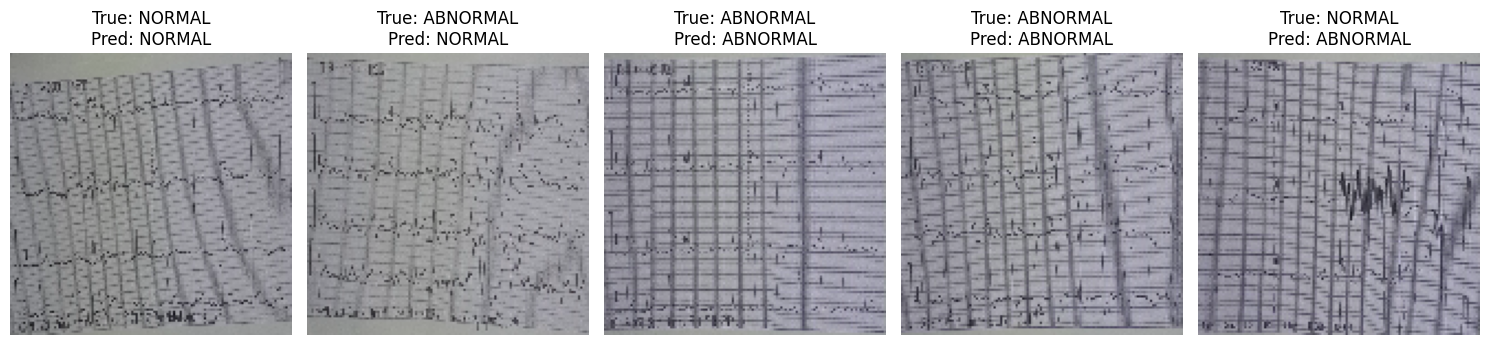

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a few sample images from the test set
num_samples = 5 # You can adjust the number of samples to display
sample_indices = np.random.choice(len(x_test), num_samples, replace=False)

sample_images = x_test[sample_indices]
sample_true_labels = y_test[sample_indices]

# Make predictions on the sample images
sample_predictions = model.predict(sample_images)
sample_predicted_classes = (sample_predictions > 0.5).astype("int32")

# Assuming you have the original label mapping from string to numerical
# If not, you might need to infer it or get it from your data loading step
# Example: Assuming 0 was 'ABNORMAL' and 1 was 'NORMAL'
label_map_inverse = {0: 'ABNORMAL', 1: 'NORMAL'} # Adjust this based on your actual mapping

# Display the images with their true and predicted labels
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i])
    true_label = label_map_inverse.get(sample_true_labels[i], 'Unknown')
    predicted_label = label_map_inverse.get(sample_predicted_classes[i][0], 'Unknown') # Access the scalar value

    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()